In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy
import scipy.signal as signal

In [2]:
x = loadmat('C:/Users/rajra/OneDrive/Desktop/books/analysis of neural data/Ch7-LFP-1')

In [3]:
time = x['t']
t = time[0,:]

lfp = x['LFP']
lfp = lfp[0,:]

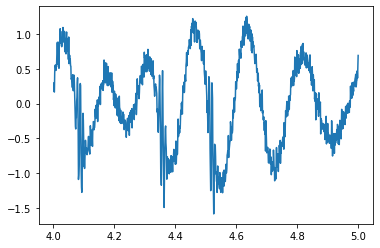

In [4]:
plt.plot(t[4000:5000],lfp[4000:5000])


In [5]:
def compute_spectrum(e,t):
    del_t = t[1] - t[0]
    N = len(e)
    T = t[-1]
    
    e = e - np.mean(e)
    eh = np.multiply(np.hanning(N),e)
    ef = np.fft.fft(eh)
    Sxx = (2*del_t*del_t*ef*np.conj(ef))/T
    N = len(e)/2
    Sxx = Sxx[0:int(N)]
    
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    plt.plot(faxis,10*np.log10(Sxx/max(Sxx)))
    plt.xlim(0,100)
    plt.ylim(-80,0)

C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


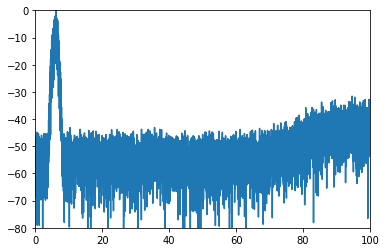

In [6]:
compute_spectrum(lfp,t)

In [20]:
def cfc_analysis(e,t):
    del_t = t[1] - t[0]
    sampling_f = 1/del_t
    nf = sampling_f/2
    n=100
    
    a = 5/nf
    b = 7/nf
    fir_filter_low = signal.firwin(n, cutoff = [5,7]/nf,pass_zero=False)
    v_low = signal.filtfilt(fir_filter_low,1,lfp)
    
    c = 80/nf
    d = 120/nf
    fir_filter_high = signal.firwin(n, cutoff = [80,120]/nf,pass_zero=False)
    v_high = signal.filtfilt(fir_filter_high,1,lfp)
    
    phi = np.angle(signal.hilbert(v_low))
    amp = np.absolute(signal.hilbert(v_high))
    
    p_bins = np.arange(-math.pi,math.pi,0.1)
    len_bins = p_bins.size-1
    a_mean = [0]*len_bins
    p_mean = [0]*len_bins
    
    for k in range(len_bins):
        pl = p_bins[k]
        pr = p_bins[k+1]
        indexes = [i for i,x in enumerate(phi) if (x >= pl and x<= pr)]
        a_mean[k] = np.mean(amp[indexes])
        p_mean[k] = np.mean([pl,pr])
        
    plt.plot(p_mean,a_mean)
    return phi,amp
    

[0.04318232280236886, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.04318232280236886, 0.03680797488197342, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.03244924053267866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.032

[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.03244924053267866, 0.031597548851663465, 0.03157165523891444, 0.031050647853236697, 0.03123261522621667, 0.030856169308288914, 0.030749395301126685, 0.031125312250335296, 0.030021436962241063, 0.029754556394231052, 0.029390904987827714, 0.02865944320538483, 0.02862405547899835, 0.027805359926723505, 0.027908755396466593, 0.027704282269875515, 0.027890578205726307, 0.02823055711327564, 0.028192804541271016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.03244924053267866, 0.031597548851663465, 0.03157165523891444, 0.031050647853236697, 0.03123261522621667, 0.030856169308288914, 0.030749395301126685, 0.031125312250335296, 0.030021436962241063, 0.029754556394231052, 0.029390904987827714, 0.02865944320538483, 0.02862405547899835, 0.027805359926723505, 0.027908755396466593, 0.02770428226

[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.03244924053267866, 0.031597548851663465, 0.03157165523891444, 0.031050647853236697, 0.03123261522621667, 0.030856169308288914, 0.030749395301126685, 0.031125312250335296, 0.030021436962241063, 0.029754556394231052, 0.029390904987827714, 0.02865944320538483, 0.02862405547899835, 0.027805359926723505, 0.027908755396466593, 0.027704282269875515, 0.027890578205726307, 0.02823055711327564, 0.028192804541271016, 0.02848849559503068, 0.028763993602861342, 0.028985048046718715, 0.02908715982717007, 0.029050884292001387, 0.029272353066002448, 0.029108823352492236, 0.028932408579123905, 0.029126921601774425, 0.02879914252463513, 0.028854989384920194, 0.028806668961183352, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.03244924053267866, 0.031597548851663465, 0.03157165523891444, 0.031050647853236697, 0.03123261522621667, 0.0308

[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.03244924053267866, 0.031597548851663465, 0.03157165523891444, 0.031050647853236697, 0.03123261522621667, 0.030856169308288914, 0.030749395301126685, 0.031125312250335296, 0.030021436962241063, 0.029754556394231052, 0.029390904987827714, 0.02865944320538483, 0.02862405547899835, 0.027805359926723505, 0.027908755396466593, 0.027704282269875515, 0.027890578205726307, 0.02823055711327564, 0.028192804541271016, 0.02848849559503068, 0.028763993602861342, 0.028985048046718715, 0.02908715982717007, 0.029050884292001387, 0.029272353066002448, 0.029108823352492236, 0.028932408579123905, 0.029126921601774425, 0.02879914252463513, 0.028854989384920194, 0.028806668961183352, 0.028769476070000487, 0.028722011018152735, 0.028188488711902427, 0.028373222128838083, 0.02932061683112171, 0.032797266289894364, 0.03933216683434497, 0.04905324478575919, 0.06029584945346389, 0.07429055358939343, 0.08727287541418287, 0.09991887782140431, 0, 0,

[0.04318232280236886, 0.03680797488197342, 0.034529836432836886, 0.03244924053267866, 0.031597548851663465, 0.03157165523891444, 0.031050647853236697, 0.03123261522621667, 0.030856169308288914, 0.030749395301126685, 0.031125312250335296, 0.030021436962241063, 0.029754556394231052, 0.029390904987827714, 0.02865944320538483, 0.02862405547899835, 0.027805359926723505, 0.027908755396466593, 0.027704282269875515, 0.027890578205726307, 0.02823055711327564, 0.028192804541271016, 0.02848849559503068, 0.028763993602861342, 0.028985048046718715, 0.02908715982717007, 0.029050884292001387, 0.029272353066002448, 0.029108823352492236, 0.028932408579123905, 0.029126921601774425, 0.02879914252463513, 0.028854989384920194, 0.028806668961183352, 0.028769476070000487, 0.028722011018152735, 0.028188488711902427, 0.028373222128838083, 0.02932061683112171, 0.032797266289894364, 0.03933216683434497, 0.04905324478575919, 0.06029584945346389, 0.07429055358939343, 0.08727287541418287, 0.09991887782140431, 0.116

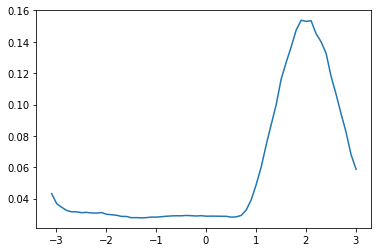

In [21]:
phi,amp = cfc_analysis(lfp,t)

In [24]:
n_samples = 100
h_samples = [0]*n_samples
for n_sample in range(n_samples):
    if n_sample % 10 == 0:
        print(n_sample)
    amp_sample = amp[np.random.permutation(len(amp))]
    p_bins = np.arange(-math.pi,math.pi,0.1)
    len_bins = p_bins.size -1
    a_mean = [0]*len_bins
    p_mean = [0]*len_bins
    for k in range(len_bins):
        pl = p_bins[k]
        pr = p_bins[k+1]
        indexes = [i for i,x in enumerate(phi) if (x >= pl and x<= pr)]
        a_mean[k] = np.mean(amp_sample[indexes])
        p_mean[k] = np.mean([pl,pr])
    h_samples[n_sample] = max(a_mean) - min(a_mean)
    
    


0
10
20
30
40
50
60
70
80
90


In [28]:
h = max(amp) - min(amp)
p_val = np.mean(h_samples >= h)

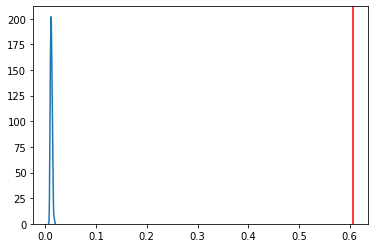

In [32]:
import seaborn as sns
sns.kdeplot(h_samples)
plt.axvline(h,c="r")